# Review

In [146]:
import pandas as pd
import numpy as np
import random
random.randint(0, 100)

77

In [116]:
import matplotlib
matplotlib.rcParams["font.size"] = 16

In [150]:
max_time = 25
(np.arange(0, 100) * max_time / 100)

array([ 0.  ,  0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ,
        2.25,  2.5 ,  2.75,  3.  ,  3.25,  3.5 ,  3.75,  4.  ,  4.25,
        4.5 ,  4.75,  5.  ,  5.25,  5.5 ,  5.75,  6.  ,  6.25,  6.5 ,
        6.75,  7.  ,  7.25,  7.5 ,  7.75,  8.  ,  8.25,  8.5 ,  8.75,
        9.  ,  9.25,  9.5 ,  9.75, 10.  , 10.25, 10.5 , 10.75, 11.  ,
       11.25, 11.5 , 11.75, 12.  , 12.25, 12.5 , 12.75, 13.  , 13.25,
       13.5 , 13.75, 14.  , 14.25, 14.5 , 14.75, 15.  , 15.25, 15.5 ,
       15.75, 16.  , 16.25, 16.5 , 16.75, 17.  , 17.25, 17.5 , 17.75,
       18.  , 18.25, 18.5 , 18.75, 19.  , 19.25, 19.5 , 19.75, 20.  ,
       20.25, 20.5 , 20.75, 21.  , 21.25, 21.5 , 21.75, 22.  , 22.25,
       22.5 , 22.75, 23.  , 23.25, 23.5 , 23.75, 24.  , 24.25, 24.5 ,
       24.75])

Text(0.5, 1.0, 'Program Runtime')

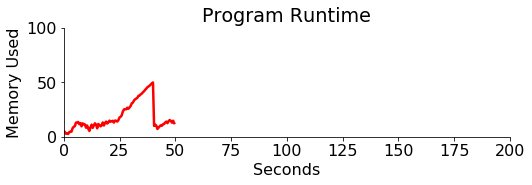

In [159]:

def gen_series(max_mem, max_time):
    values = pd.Series([random.randint(0, 20) for i in range(104)])
    values = values.rolling(5).mean().iloc[4:].values
    for i in range(0, 41):
        p = i/40
        values[40+i] = (1-p) * values[40+i] + p * max_mem
    index = (np.arange(0, 100) * max_time / 100)
    return pd.Series(values, index=index)

s = gen_series(50, 50)
ax = s.plot.line(color="red", linewidth=2.5, figsize=(8, 2), xlim=(0,200), ylim=(0,100))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel("Seconds")
ax.set_ylabel("Memory Used")
ax.set_title("Program Runtime")

Text(0.5, 1.0, 'Program Runtime')

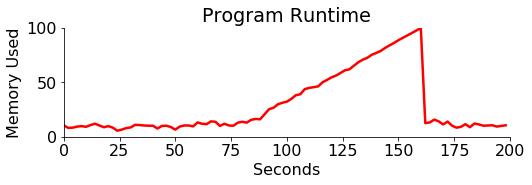

In [160]:
s = gen_series(100, 200)
ax = s.plot.line(color="red", linewidth=2.5, figsize=(8, 2), xlim=(0,200), ylim=(0,100))
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.set_xlabel("Seconds")
ax.set_ylabel("Memory Used")
ax.set_title("Program Runtime")

NameError: name 'times' is not defined

# Part 1: Regex

## Raw Strings, Escaping

In [1]:
print("A\tB")

In [2]:
print("A\\tB")

In [3]:
print(r"A\tB")

## Regular Expressions

In [4]:
import re

# from DS100
def reg(regex, text):
    """
    Prints the string with the regex match highlighted.
    """
    print(re.sub(f'({regex})', r'\033[1;30;43m\1\033[m', text))

In [5]:
s1 = " ".join(["A DAG is a directed graph without cycles.",
               "A tree is a DAG where every node has one parent (except the root, which has none).",
               "To learn more, visit www.example.com or call 1-608-123-4567. :)"])
print(s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)


In [6]:
s2 = """1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
"""
print(s2)

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567



In [40]:
s3 = "In CS 320, there are 2 exams, 6 projects, 41 lectures, and 1000 things to learn.  CS 320 is awesome!"
s3

'In CS 320, there are 2 exams, 6 projects, 41 lectures, and 1000 things to learn.  CS 320 is awesome!'

In [7]:
reg(r"DAG", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)


In [8]:
reg(r"a", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)


## Character Classes/Ranges

In [9]:
# character class
reg(r"[aeiouAEIOU]", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)


In [10]:
# character ranges
reg(r"[A-Z]", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)


In [11]:
# negative character class
reg(r"[^,.(): ]", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)


In [12]:
# meta characters
reg(r"\d", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)


In [13]:
reg(r".", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)


In [14]:
reg(r"\.", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)


## Repetition

In [15]:
reg(r"w{3}", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)


In [16]:
reg(r"w{2}", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)


In [17]:
reg(r"(.*)", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)


In [18]:
reg(r"\(.*\)", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)


In [19]:
reg(r"\(.*?\)", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)


## Anchoring

1st sentence, 1st two, last word.

In [20]:
reg(r"[^\.]*\.", s1) # first escaping not necessary!

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)


In [21]:
reg(r"^[^\.]*\.", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)


In [22]:
reg(r"^([^\.]*\.){2}", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)


In [23]:
reg(r"\s[^\s]+$", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)


## Practice: Phone Numbers

In [24]:
reg(r".-.{3}-.{3}-.{4}", s1)

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)


In [25]:
reg(r".-.{3}-.{3}-.{4}", s2)

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567



In [26]:
reg(r"\d-\d{3}-\d{3}-\d{4}", s2)

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567



In [27]:
reg(r"((\d-)?\d{3}-)?\d{3}-\d{4}", s2)

1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567



## Part 2: Regex in Python

In [43]:
import re

In [41]:
s3

'In CS 320, there are 2 exams, 6 projects, 41 lectures, and 1000 things to learn.  CS 320 is awesome!'

In [66]:
re.findall(r"((\d+) (\w+))", s3)

[('2 exams', '2', 'exams'),
 ('6 projects', '6', 'projects'),
 ('41 lectures', '41', 'lectures'),
 ('1000 things', '1000', 'things'),
 ('320 is', '320', 'is')]

In [59]:
list(re.finditer(r"(\d+) (projects)", s3))

[<re.Match object; span=(30, 40), match='6 projects'>]

In [46]:
re.sub(r"\d+", "###", s3)

'In CS ###, there are ### exams, ### projects, ### lectures, and ### things to learn.  CS ### is awesome!'

In [50]:
re.sub(r"(\d)", "\g<1>|", s3)

'In CS 3|2|0|, there are 2| exams, 6| projects, 4|1| lectures, and 1|0|0|0| things to learn.  CS 3|2|0| is awesome!'

In [61]:
re.findall(r"\d+", s3)

['320', '2', '6', '41', '1000', '320']

In [62]:
re.sub(r"\d+", "###", s3)

'In CS ###, there are ### exams, ### projects, ### lectures, and ### things to learn.  CS ### is awesome!'

In [69]:
s4 = """In CS 320,  there are 2 exams,    6 projects,
41 lectures, and 1000 things to learn.  CS 320 is awesome!"""
print(s4)

In CS 320,   there are 2 exams,    6 projects, 41 lectures, and 1000 things to learn.
CS 320 is awesome!


In [95]:
s = s3
print(re.sub(r"(\d+)", r"<b>\g<1></b>", s))

In CS <b>320</b>, there are <b>2</b> exams, <b>6</b> projects, <b>41</b> lectures, and <b>1000</b> things to learn.  CS <b>320</b> is awesome!


In [96]:
from IPython.core.display import HTML
HTML(re.sub(r"(\d+)", r"<b>\g<1></b>", s))

In [97]:
import re

# from DS100
def reg(text, regex):
    """
    Prints the string with the regex match highlighted.
    """
    print(re.sub(f'({regex})', r'\033[1;30;43m\1\033[m', text))

s1 = " ".join([
  "A DAG is a directed graph without cycles.",
  "A tree is a DAG where every node has one parent (except the root, which has none).",
  "To learn more, visit www.example.com or call 1-608-123-4567. :)"])

s2 = """1-608-123-4567
a-bcd-efg-hijg (not a phone number)
1-608-123-456 (not a phone number)
608-123-4567
123-4567
"""

s3 = "In CS 320, there are 2 exams, 6 projects, 41 lectures, and 1000 things to learn.  CS 320 is awesome!"

In [98]:
reg(s1, r"\d")

A DAG is a directed graph without cycles. A tree is a DAG where every node has one parent (except the root, which has none). To learn more, visit www.example.com or call 1-608-123-4567. :)
